In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loan Default Risk Analysis and Prediction

La prédiction du risque de défaut de paiement des prêts joue un rôle crucial pour les banques, les prêteurs et les agences de crédit. Elle leur permet d'anticiper et de prévenir les défauts avant qu'ils ne surviennent, plutôt que de subir passivement les pertes liées à l'insolvabilité. Aujourd'hui, nous allons analyser les profils des clients en examinant leurs revenus, leurs actifs, leur profession, leur statut matrimonial, entre autres caractéristiques, pour comparer les clients solvables à ceux en défaut de paiement. Nous utiliserons ensuite des modèles d'apprentissage automatique afin d’évaluer leur efficacité à réduire le risque de défaut de prêt.

# Customer Profiling and Analysis

In [ ]:
# Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
train=pd.read_csv('/content/drive/MyDrive/Loan Default Risk Analysis and Prediction/Training Data.csv')

In [ ]:
train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
train['Risk_Flag'].value_counts()

,count
Risk_Flag,
0,221004
1,30996


In [ ]:
train['Risk_Flag'].value_counts(normalize=True)*100

,proportion
Risk_Flag,
0,87.7
1,12.3


# Variables numériques  
Nous commencerons par examiner les relations entre les catégories de risque et les variables numériques du jeu de données en utilisant des histogrammes (histplot). Cela nous permettra d’identifier d’éventuelles tendances ou motifs dans leur distribution.

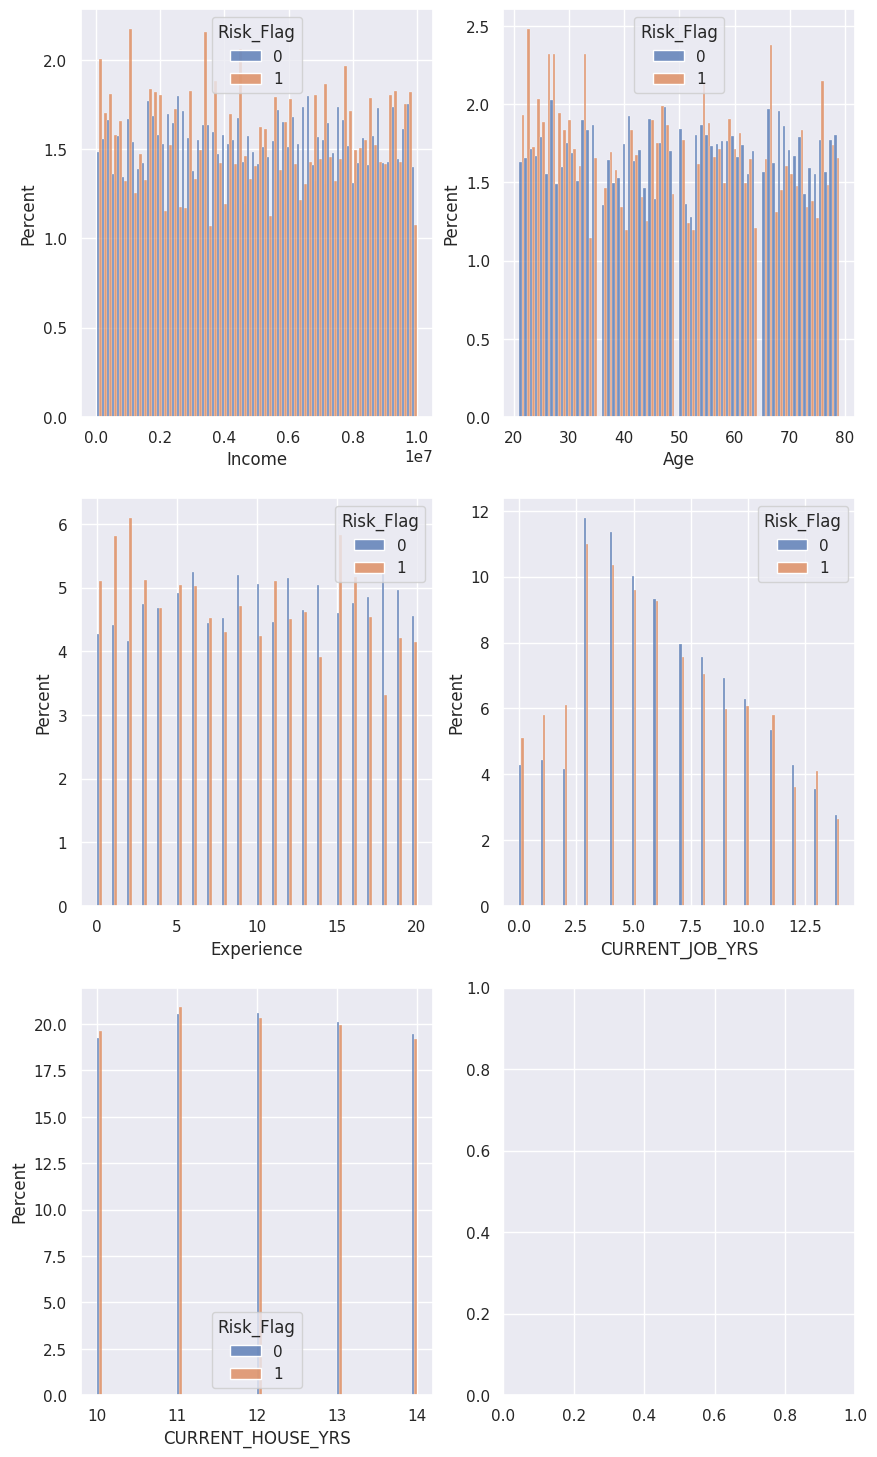

In [ ]:
#using a for loop to draw multiple kdeplots
fig, axes = plt.subplots(3,2,figsize=(10, 18))

col1=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

for col, ax in zip(col1, axes.flat):
    sns.histplot(x=col,data=train, hue='Risk_Flag',common_norm=False, stat='percent',multiple='dodge', ax=ax)
plt.show()

Les graphiques générés présentent la distribution des variables numériques (revenu, âge, expérience, années au poste actuel, années dans la résidence actuelle) en fonction des catégories de risque (`Risk_Flag` : 0 pour les clients sans risque, 1 pour ceux à risque). Voici une interprétation des tendances visibles :

1. **Revenu (`Income`)** :  
   - La distribution des revenus semble uniforme pour les deux catégories de risque (0 et 1), sans différence notable.  
   - Cela suggère que le revenu seul n'est pas un indicateur fort pour différencier les clients à risque des clients sans risque.

2. **Âge (`Age`)** :  
   - La distribution de l'âge est similaire pour les deux groupes, couvrant une large gamme entre 20 et 80 ans.  
   - Là encore, aucune tendance spécifique ne se dégage pour identifier les clients à risque uniquement en fonction de leur âge.

3. **Expérience (`Experience`)** :  
   - Les clients avec peu d'expérience (entre 0 et 5 ans) semblent légèrement plus représentés dans la catégorie à risque (Risk_Flag = 1).  
   - Cela pourrait indiquer une corrélation entre une faible expérience professionnelle et un risque accru de défaut.

4. **Années au poste actuel (`CURRENT_JOB_YRS`)** :  
   - Une tendance se dessine : les clients ayant passé moins de 5 ans dans leur poste actuel semblent avoir une probabilité plus élevée d'être dans la catégorie à risque.  
   - Les proportions des clients à risque diminuent à mesure que les années au poste augmentent.

5. **Années dans la résidence actuelle (`CURRENT_HOUSE_YRS`)** :  
   - Les données montrent des pics spécifiques entre 10 et 14 ans pour les deux groupes.  
   - Il semble que cette variable n'offre pas une discrimination claire entre les clients à risque et ceux sans risque.

### Observations globales :
- Les variables telles que l'expérience et les années au poste actuel montrent des différences entre les groupes de risque, ce qui en fait des candidates intéressantes pour le modèle prédictif.  
- D'autres variables, comme le revenu et l'âge, semblent moins discriminantes lorsqu'elles sont analysées individuellement.  
- Ces tendances devront être validées avec des modèles de machine learning pour évaluer leur importance réelle dans la prédiction du risque.

# Variables catégoriques

Maintenant que nous avons examiné les variables numériques, nous allons utiliser des diagrammes en barres (countplots) pour explorer les relations entre les catégories de risque et les variables catégoriques.

## 1. Marriage Status vs Default Risk

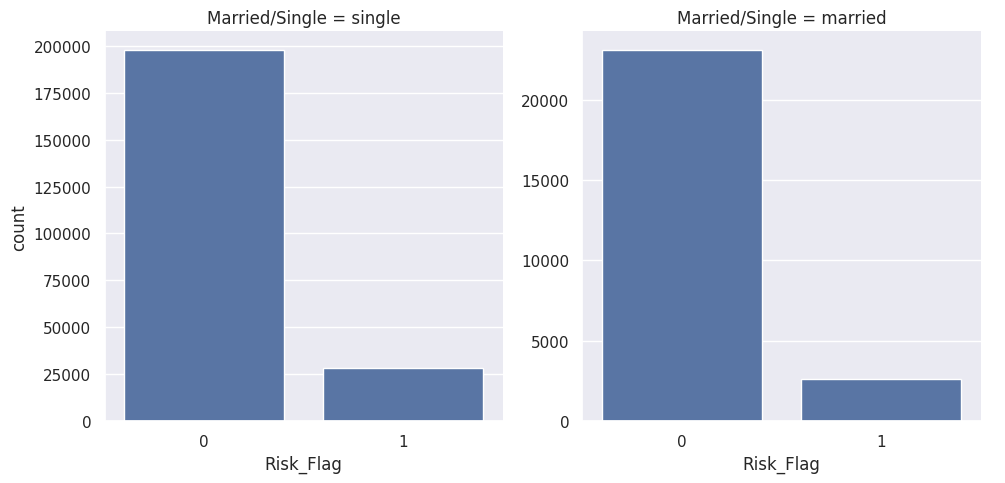

In [ ]:
sns.catplot(x='Risk_Flag',data=train, col='Married/Single',kind='count',sharey=False)
plt.show()

## Observation globale :
- Les célibataires semblent représenter une part plus importante des clients en défaut de paiement que les mariés, bien que la majorité des deux groupes reste dans la catégorie sans risque.
- Cela pourrait indiquer que l'état matrimonial est un facteur potentiel à prendre en compte dans l'évaluation du risque, mais d'autres variables doivent être analysées pour confirmer cette tendance.

## 2. House Ownership vs Default Risk

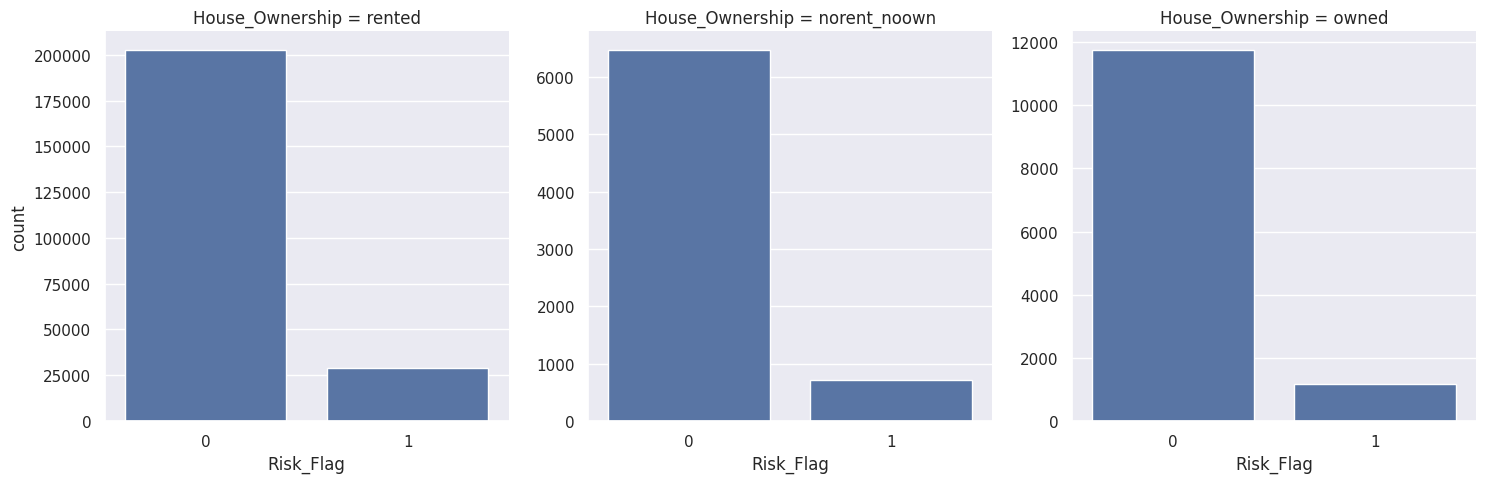

In [ ]:
sns.catplot(x='Risk_Flag',data=train, col='House_Ownership',kind='count',sharey=False)
plt.show()

Nous pouvons constater à partir des graphiques ci-dessus que les locataires présentent le risque le plus élevé de défaut de paiement, tandis que les propriétaires de biens immobiliers sont moins susceptibles de faire défaut.

## 3. Profession and State vs Default Risk

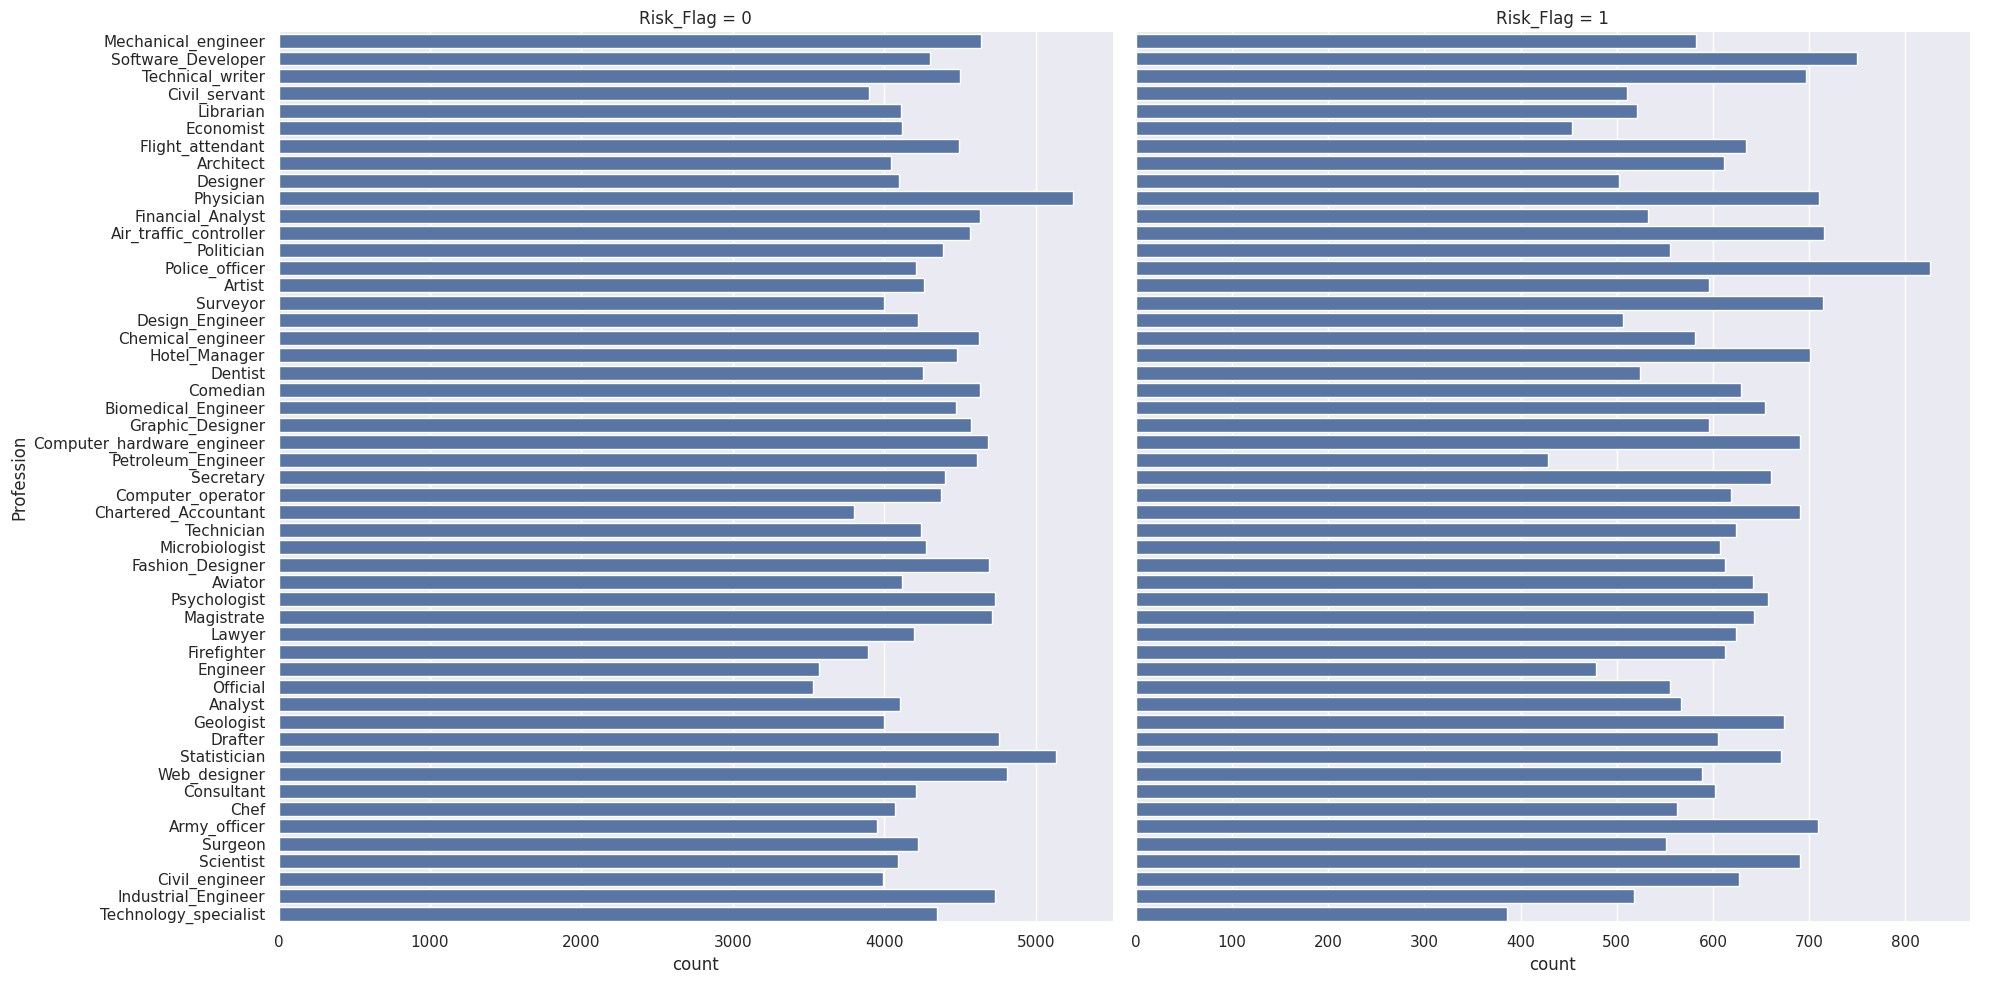

In [ ]:
sns.catplot(y='Profession',data=train, col='Risk_Flag',kind='count',sharex=False,height=10)
plt.show()

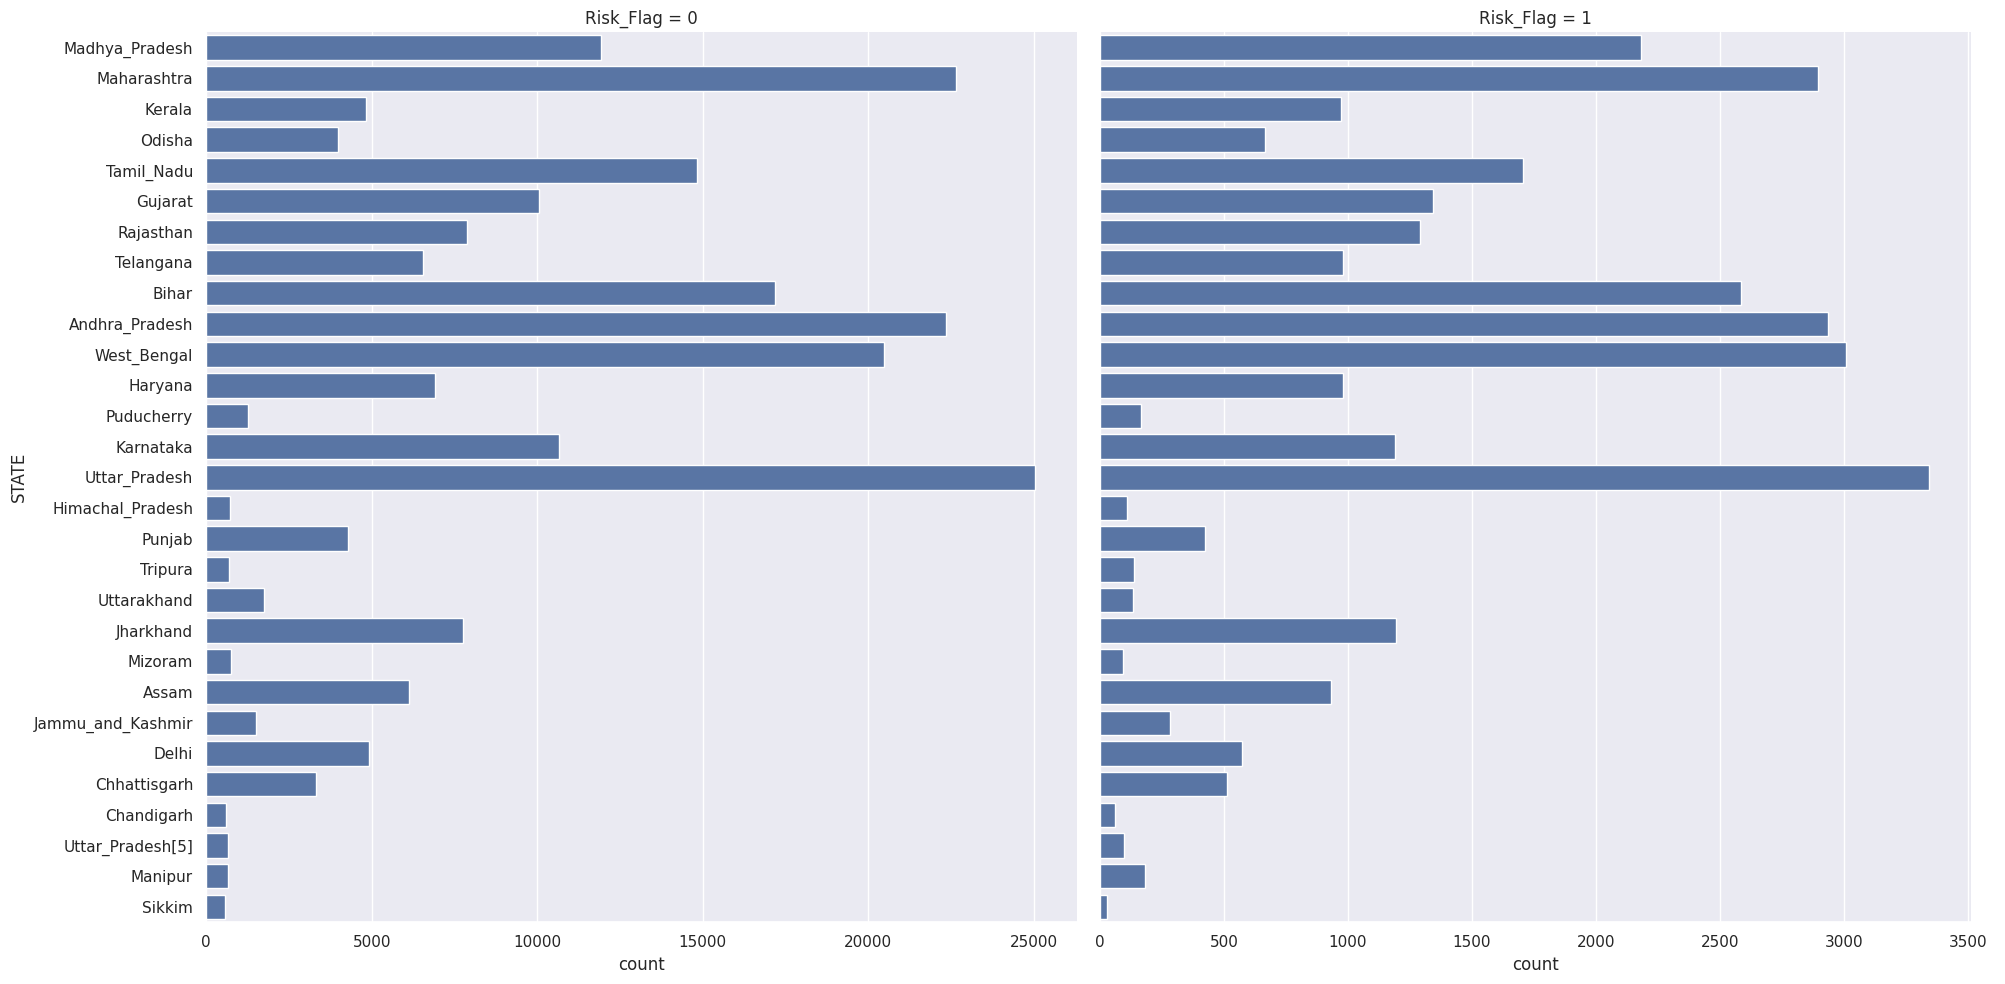

In [ ]:
sns.catplot(y='STATE',data=train, col='Risk_Flag',kind='count',sharex=False,height=10)
plt.show()

Les deux diagrammes en barres ci-dessus montrent que la répartition des emplois/professions et des régions diffère, dans une certaine mesure, entre les clients solvables et ceux en défaut de paiement. Ces deux variables catégoriques pourraient donc être révélatrices de la probabilité de défaut.

# Prédiction du Risque de Défaut  

Après avoir analysé ces différentes variables individuellement, nous allons mettre en place des modèles prédictifs pour évaluer leur performance sur les données d'entraînement et les utiliser pour classifier notre jeu de données de test. Dans cet article, nous explorerons deux méthodes de modélisation : la régression logistique et la forêt aléatoire (Random Forest).

## 1. Logistic Regression

In [ ]:
#transform non-numeric variables into binary dummy variables
train1=pd.get_dummies(train,drop_first=True)

In [ ]:
train1.head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1,1303834,23,3,3,13,0,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,7574516,40,10,9,13,0,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,3991815,66,4,4,10,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,6256451,41,2,2,12,1,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,5768871,47,11,3,14,1,True,False,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
y=train1['Risk_Flag'].values
X=train1.drop(['Risk_Flag'],axis=1).values

In [ ]:
#using SMOTE to resample the dataset to correct its class imbalance
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.54     66302
           1       0.53      0.50      0.51     66301

    accuracy                           0.53    132603
   macro avg       0.53      0.53      0.53    132603
weighted avg       0.53      0.53      0.53    132603



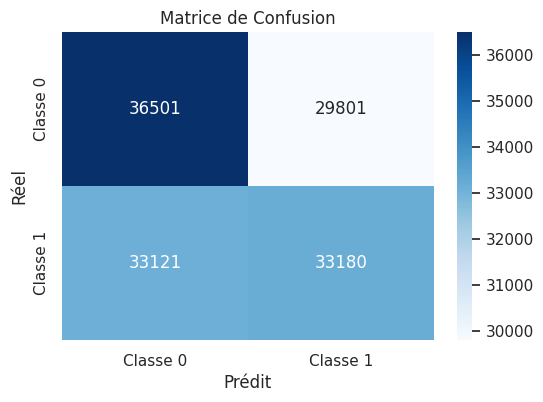

In [ ]:
#print out classification report and confusion matrix to evaluate the model
print('Classification report:\n', classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [ ]:
print("Pourcentage de clients en défaut dans le jeu de données de test :", round(np.mean(y_test), 2) * 100, '%')

Pourcentage de clients en défaut dans le jeu de données de test : 50.0 %


Les résultats sont assez décevants. Après le rééchantillonnage SMOTE, la proportion de clients défaillants et non défaillants devrait être proche de 50-50. Le modèle de régression logistique ci-dessus n'obtient qu'une précision de 51 %, ce qui signifie qu'il est à peine plus précis que de classer les clients de manière aléatoire. De plus, il y a beaucoup de faux positifs, ce qui rend ce modèle difficilement utilisable.

## 2. Forêt Aléatoire  
Nous utilisons ensuite l'algorithme de forêt aléatoire accompagné de Grid Search pour déterminer quelles configurations d'hyperparamètres sont les meilleures. Nous utilisons le score F1 comme critère pour choisir la meilleure configuration, car nous souhaitons un bon équilibre entre un faible nombre de faux positifs et de faux négatifs.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [30, 45, 50]}
model = RandomForestClassifier(random_state=0)
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
CV_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [30, 45, 50]}, scoring='f1')

Best: 0.945576 using {'max_depth': 50}
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     66302
           1       0.96      0.94      0.95     66301

    accuracy                           0.95    132603
   macro avg       0.95      0.95      0.95    132603
weighted avg       0.95      0.95      0.95    132603



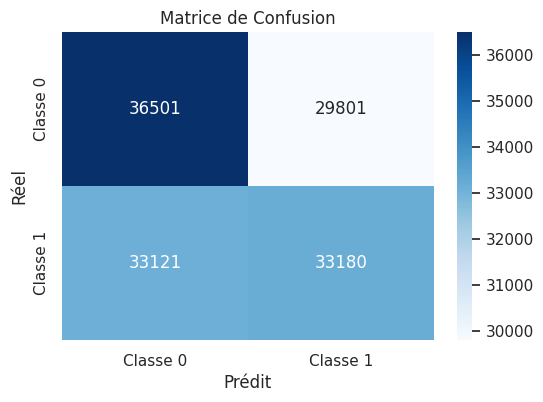

In [ ]:
# Summarize results
best_score, best_params = CV_model.best_score_, CV_model.best_params_
print("Best: %f using %s" % (best_score,best_params))

# Extract the best model and evaluate it on the test set
best_model = CV_model.best_estimator_
pred1=best_model.predict(X_test)

print('Classification report:\n', classification_report(y_test, pred1))
cm = confusion_matrix(y_test, pred)
# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Ce modèle est en effet nettement meilleur que la régression logistique. La précision et la justesse sont d'environ 79 %, ce qui est bien supérieur à une classification aléatoire du jeu de données. Le taux de rappel est également assez bon, ce qui signifie que nous pouvons identifier davantage de clients potentiellement à risque. Avec ce modèle en place, nous pouvons maintenant l'utiliser sur le jeu de données de test pour générer nos recommandations finales de classification.

In [ ]:
#test
test=pd.read_csv('/content/drive/MyDrive/Loan Default Risk Analysis and Prediction/Test Data.csv')
X=pd.get_dummies(test,drop_first=True).values
y=best_model.predict(X)
y=pd.Series(y)
prediction=pd.concat([test['ID'],y],axis=1).set_index('ID')
prediction

,0
ID,
1,0
2,0
3,0
4,0
5,0
...,...
27996,0
27997,0
27998,0


In [ ]:
print("Pourcentage de clients potentiellement à risque dans le jeu de données de test :", round(np.mean(y), 2) * 100, '%')

Pourcentage de clients potentiellement à risque dans le jeu de données de test : 12.0 %


Selon notre modèle, nous pouvons constater qu'environ 12 % des clients sont potentiellement à risque